In [1]:
import pandas as pd
import re
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def load_data():
    olympics = pd.read_csv('files/olympics.csv', skiprows = 1, encoding = 'utf-8')
    olympics.rename(columns = {'Unnamed: 0':'Country_name'}, inplace = True)
    for i in olympics.columns:
        if bool(re.match(".*01 !.*", i)):
            olympics.rename(columns = {i:re.sub('01 !', 'Gold', i)}, inplace = True)
        elif bool(re.match(".*02 !.*", i)):
            olympics.rename(columns = {i:re.sub('02 !', 'Silver', i)}, inplace = True)
        elif bool(re.match(".*03 !.*", i)):
            olympics.rename(columns = {i:re.sub('03 !', 'Bronze', i)}, inplace = True)
    olympics['Country_name'] = olympics['Country_name'].apply(lambda x: x.split("\xa0")[0])
    olympics.index = olympics['Country_name']
    olympics.drop("Totals", axis = 0, inplace = True)
    return olympics

def first_country(df):
    return df.iloc[0,:]

def gold_medal(df):
    return df['Country_name'][df['Gold.2'] == df['Gold.2'].max()][0]


def biggest_difference_in_gold_medal(df):
    return df['Country_name'][abs(df['Total'] - df['Total.1']) == abs(df['Total'] - df['Total.1']).max()][0]

def get_points(df):
    df['points'] = (df['Gold.2'] * 3 + df['Silver.2'] * 2 + df['Bronze.2'])
    return df['points']

def k_means_errors(df):
    no_of_clusters_and_errors = []
    for i in range(2, 10):
        km = KMeans(n_clusters = i, init = 'k-means++').fit(df.iloc[:, 1:])
        no_of_clusters_and_errors.append((i, km.inertia_))
    return no_of_clusters_and_errors

def k_means(df, no_of_clusters):
    km = KMeans(n_clusters = no_of_clusters, init = 'k-means++').fit(df.iloc[:, 1:])
    return km.cluster_centers_

# Loaded and preprocessed dataframe

In [3]:
olympics_data = load_data()
olympics_data.head()

,Country_name,# Summer,Gold,Silver,Bronze,Total,# Winter,Gold.1,Silver.1,Bronze.1,Total.1,# Games,Gold.2,Silver.2,Bronze.2,Combined total
Country_name,,,,,,,,,,,,,,,,
Afghanistan,Afghanistan,13,0,0,2,2,0,0,0,0,0,13,0,0,2,2
Algeria,Algeria,12,5,2,8,15,3,0,0,0,0,15,5,2,8,15
Argentina,Argentina,23,18,24,28,70,18,0,0,0,0,41,18,24,28,70
Armenia,Armenia,5,1,2,9,12,6,0,0,0,0,11,1,2,9,12
Australasia,Australasia,2,3,4,5,12,0,0,0,0,0,2,3,4,5,12


# Details of the first country in the dataframe.

In [4]:
first_country(olympics_data)

Country_name      Afghanistan
# Summer                   13
Gold                        0
Silver                      0
Bronze                      2
Total                       2
# Winter                    0
Gold.1                      0
Silver.1                    0
Bronze.1                    0
Total.1                     0
# Games                    13
Gold.2                      0
Silver.2                    0
Bronze.2                    2
Combined total              2
Name: Afghanistan, dtype: object

# Country with most gold medals

In [5]:
gold_medal(olympics_data)

'United States'

# Country with biggest difference between their summer and winter gold medal counts

In [6]:
biggest_difference_in_gold_medal(olympics_data)

'United States'

# Weighted points for each country
### One gold medal counts for 3 points
### One silver medal counts for 2 points
### Onr bronze medal counts for 1 point

In [7]:
get_points(olympics_data)

Country_name
Afghanistan                            2
Algeria                               27
Argentina                            130
Armenia                               16
Australasia                           22
Australia                            923
Austria                              569
Azerbaijan                            43
Bahamas                               24
Bahrain                                1
Barbados                               1
Belarus                              154
Belgium                              276
Bermuda                                1
Bohemia                                5
Botswana                               2
Brazil                               184
British West Indies                    2
Bulgaria                             411
Burundi                                3
Cameroon                              12
Canada                               846
Chile                                 24
China                               1120
Col

# The elbow method is used to determine the number of clusters in k-means clustering

In [8]:
no_of_clusters_errors = k_means_errors(olympics_data)

In [9]:
x, y = zip(*no_of_clusters_errors)

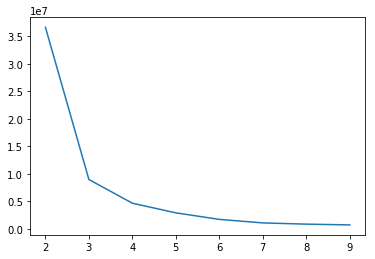

In [10]:
plt.plot(x, y)

It can observed the squared distance of the samples from their cluster centers from k = 5 is approximately the same

Thus the value of k can be taken as 5

For k = 5, the cluster centers are as follows. 

In [11]:
no_of_clusters = 5
k_means(olympics_data, no_of_clusters)

array([[  2.00000000e+01,   1.29666667e+02,   1.22083333e+02,
          1.35416667e+02,   3.87166667e+02,   1.76666667e+01,
          3.84166667e+01,   3.84166667e+01,   3.80000000e+01,
          1.14833333e+02,   3.76666667e+01,   1.68083333e+02,
          1.60500000e+02,   1.73416667e+02,   5.02000000e+02,
          9.98666667e+02],
       [  1.18695652e+01,   4.81739130e+00,   5.68695652e+00,
          7.73043478e+00,   1.82347826e+01,   4.04347826e+00,
          2.69565217e-01,   3.82608696e-01,   3.65217391e-01,
          1.01739130e+00,   1.59130435e+01,   5.08695652e+00,
          6.06956522e+00,   8.09565217e+00,   1.92521739e+01,
          3.54956522e+01],
       [  2.60000000e+01,   9.76000000e+02,   7.57000000e+02,
          6.66000000e+02,   2.39900000e+03,   2.20000000e+01,
          9.60000000e+01,   1.02000000e+02,   8.40000000e+01,
          2.82000000e+02,   4.80000000e+01,   1.07200000e+03,
          8.59000000e+02,   7.50000000e+02,   2.68100000e+03,
          5.6840